### Урок 5. Домашняя работа

**Задача высокого уровня** В реализацию функции `gradient` добавьте параметр $\lambda$, чтобы получить регуляризованный градиентный спуск

Формула поменяется следующим образом:
$$
\left\{
\begin{array}{cc}
\frac{\partial L}{\partial w_0} = \frac{2}{n}\cdot(-1)\cdot \sum_{i=1}^{n} (1\cdot \left(y_i - \sum_{j=1}^{m}w_jx_j^i\right) + \lambda\cdot 2\cdot w_0)&\\
\frac{\partial L}{\partial w_k} = \frac{2}{n}\cdot(-1)\cdot \sum_{i=1}^{n} (x_k^i \cdot\left(y_i - \sum_{j=1}^{m}w_jx_j^i\right) + \lambda\cdot 2\cdot w_k)& k\neq 0 \\
\end{array}
\right.
$$

### Применяла немного другую формулу:
$2\lambda w_k$ не должно суммироваться n раз в каждой частной производной. $\lambda\sum_{j=0}^{m}w_j$ при взятии частной производной по $w_k$ превращается в $2\lambda w_k$, остальные слагаемые обнуляются
$$
\left\{
\begin{array}{cc}
\frac{\partial L}{\partial w_0} = \frac{2\cdot(-1)\cdot \sum_{i=1}^{n} \left(1\cdot \left(y_i - \sum_{j=1}^{m}w_jx_j^i\right)\right) + \lambda\cdot 2\cdot w_0}{n} &\\
\frac{\partial L}{\partial w_k} = \frac{2\cdot(-1)\cdot \sum_{i=1}^{n} \left(x_k^i \cdot\left(y_i - \sum_{j=1}^{m}w_jx_j^i\right)\right) + \lambda\cdot 2\cdot w_k}{n} & k\neq 0 \\
\end{array}
\right.
$$

In [4]:
import numpy as np
import pandas as pd

data = pd.read_csv('non_linear.csv', sep=',')
data = data[(data.x_train > 1) & (data.x_train < 5)].copy()
data.head()

,x_train,y_train
5,1.182421,1.860341
6,1.251605,1.878928
7,1.270474,2.430015
8,1.402553,2.327856
9,1.427711,2.203649


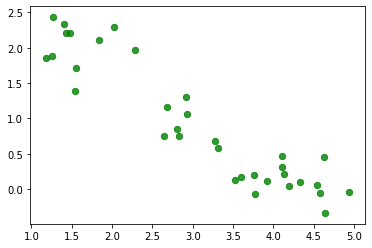

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

# основной график
plt.scatter(data.x_train, data.y_train, 40, 'g', 'o', alpha=0.8, label='data')
plt.show()

In [82]:
from scipy.spatial import distance
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def gradient(X, y, w, l) -> np.array:
    # количество обучающих примеров в выборке
    n = X.shape[0]
    # считаем прогноз
    y_hat = X.dot(w.T)
    # вычисляем ошибку прогноза
    error = y - y_hat
    # дальше pointwise перемножение - умножаем каждую из координат на ошибку
    grad = (np.multiply(X, error).sum(axis=0)*(-1.0)*2.0 + 2.0*l*w) / n
    return grad, error

In [45]:
def eval_w_next(X, y, eta, w_current, l):
    # вычисляем градиент
    grad, error = gradient(X, y, w_current, l)
    # делаем шаг градиентного спуска
    w_next = w_current - eta*grad
    # проверяем условие сходимости
    weight_evolution = distance.euclidean(w_current, w_next)
    return (w_next, weight_evolution, grad)

In [73]:
def gradient_descent(X: np.array, y: np.array, eta=0.01, epsilon=0.001, l=0) -> np.array:
    m = X.shape[1] # количество фичей
    # инициализируем рандомом веса
    w = np.random.default_rng(seed=42).random(m).reshape(1, -1)
    w_next, weight_evolution, grad = eval_w_next(X, y, eta, w, l)
    step = 0
    # повторяем до сходимости вектора весов
    while weight_evolution > epsilon:
        w = w_next
        w_next, weight_evolution, grad = eval_w_next(X, y, eta, w, l)
        step += 1
        if step % 100 ==0:
            print("step %s |w-w_next|=%.5f, grad=%s" % (step, weight_evolution, grad))
    return w

In [83]:
# трансформируем плоский массив X в вектор-столбец
X = data['x_train'].values.reshape(-1, 1)
n = X.shape[0]
# добавляем тривиальный признак w_0, столбец из единиц. См. прошлый урок, почему так
X = np.hstack([
    np.ones(n).reshape(-1,1),
    X
])

In [84]:
# первый раз проверяем с lambda=0
w = gradient_descent(X, data['y_train'].values.reshape(-1, 1), epsilon=0.001, eta=0.008)

step 100 |w-w_next|=0.00389, grad=[[-0.46703532  0.13491723]]
step 200 |w-w_next|=0.00320, grad=[[-0.38433542  0.11102686]]
step 300 |w-w_next|=0.00263, grad=[[-0.31627953  0.09136687]]
step 400 |w-w_next|=0.00217, grad=[[-0.26027459  0.07518815]]
step 500 |w-w_next|=0.00178, grad=[[-0.21418668  0.06187427]]
step 600 |w-w_next|=0.00147, grad=[[-0.17625974  0.05091793]]
step 700 |w-w_next|=0.00121, grad=[[-0.14504869  0.04190168]]


In [114]:
# второй раз проверяем с lambda=0.5
w_05 = gradient_descent(X, data['y_train'].values.reshape(-1, 1), epsilon=0.00001, eta=0.001, l=0.5)

step 100 |w-w_next|=0.00117, grad=[[-0.24967681  1.14283999]]
step 200 |w-w_next|=0.00055, grad=[[-0.49311826  0.24611344]]
step 300 |w-w_next|=0.00053, grad=[[-0.50406612  0.15565068]]
step 400 |w-w_next|=0.00051, grad=[[-0.49284473  0.14334468]]
step 500 |w-w_next|=0.00050, grad=[[-0.47980756  0.13870093]]
step 600 |w-w_next|=0.00049, grad=[[-0.46691622  0.13489192]]
step 700 |w-w_next|=0.00047, grad=[[-0.45435199  0.13125413]]
step 800 |w-w_next|=0.00046, grad=[[-0.44212398  0.12772091]]
step 900 |w-w_next|=0.00045, grad=[[-0.43022488  0.12428342]]
step 1000 |w-w_next|=0.00044, grad=[[-0.41864601  0.12093851]]
step 1100 |w-w_next|=0.00042, grad=[[-0.40737877  0.11768362]]
step 1200 |w-w_next|=0.00041, grad=[[-0.39641477  0.11451634]]
step 1300 |w-w_next|=0.00040, grad=[[-0.38574585  0.1114343 ]]
step 1400 |w-w_next|=0.00039, grad=[[-0.37536407  0.10843521]]
step 1500 |w-w_next|=0.00038, grad=[[-0.3652617   0.10551684]]
step 1600 |w-w_next|=0.00037, grad=[[-0.35543122  0.10267701]]
s

In [115]:
# третий раз проверяем с lambda=1
w_1 = gradient_descent(X, data['y_train'].values.reshape(-1, 1), epsilon=0.00001, eta=0.001, l=1)

step 100 |w-w_next|=0.00116, grad=[[-0.23141611  1.13622677]]
step 200 |w-w_next|=0.00053, grad=[[-0.47364277  0.24004657]]
step 300 |w-w_next|=0.00051, grad=[[-0.48358716  0.149662  ]]
step 400 |w-w_next|=0.00049, grad=[[-0.47151072  0.13717177]]
step 500 |w-w_next|=0.00048, grad=[[-0.45769686  0.13231235]]
step 600 |w-w_next|=0.00046, grad=[[-0.44409186  0.12829827]]
step 700 |w-w_next|=0.00045, grad=[[-0.43087237  0.12447132]]
step 800 |w-w_next|=0.00044, grad=[[-0.41804457  0.12076485]]
step 900 |w-w_next|=0.00042, grad=[[-0.4055985   0.11716935]]
step 1000 |w-w_next|=0.00041, grad=[[-0.39352296  0.11368096]]
step 1100 |w-w_next|=0.00040, grad=[[-0.38180693  0.11029643]]
step 1200 |w-w_next|=0.00039, grad=[[-0.37043971  0.10701266]]
step 1300 |w-w_next|=0.00037, grad=[[-0.35941092  0.10382667]]
step 1400 |w-w_next|=0.00036, grad=[[-0.34871048  0.10073552]]
step 1500 |w-w_next|=0.00035, grad=[[-0.33832862  0.09773641]]
step 1600 |w-w_next|=0.00034, grad=[[-0.32825584  0.09482658]]
s

In [110]:
def print_result(data, X, weight):
    support = np.linspace(X.min(), X.max(), num=100)
    # делаем предикт - считаем предсказания модели в каждой точке обучающей выборки в виде y=X*w
    y_hat = np.hstack([
        np.ones(support.size).reshape(-1, 1),
        support.reshape(-1, 1)
    ]).dot(weight.T)

    # строим график
    plt.plot(support, y_hat, 'b--', alpha=0.5, label='manifold')
    plt.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.8, label='data')
    plt.show()

[[ 2.48484292 -0.53432372]]


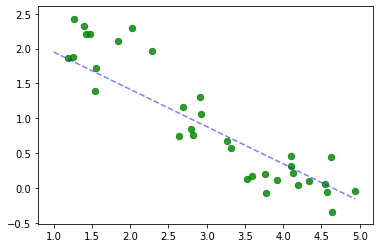

In [111]:
print(w)
print_result(data, X, w)

[[ 2.31017266 -0.48409881]]


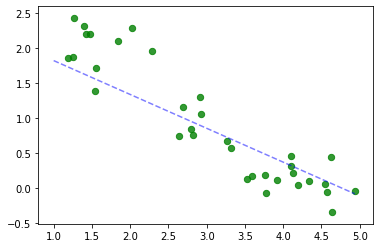

In [112]:
print(w_05)
print_result(data, X, w_05)

[[ 2.09002589 -0.42073604]]


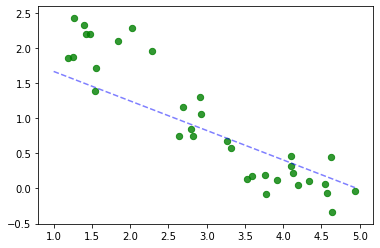

In [113]:
print(w_1)
print_result(data, X, w_1)

В этом модуле мы узнали, как  обучать линейную регрессию, не "упираясь" в аппаратные ресурсы: использовать градиентный спуск.
Мы узнали, как детектировать переобучение модели и закрепили свои знания на примере полиномиальной регрессии и выяснили, как увеличить качество решения с помощью механизма регуляризации. Познакомились с двумя видами регуляризации -  Ridge и Lasso.